In [1]:
import sys, os
from pathlib import Path
sys.path.append(str(Path(os.path.dirname(os.path.abspath("__file__"))).parent))

In [2]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch
import torch.nn.functional as F

from model.loss import create_loss

### ハイパーパラメータgammaの比較

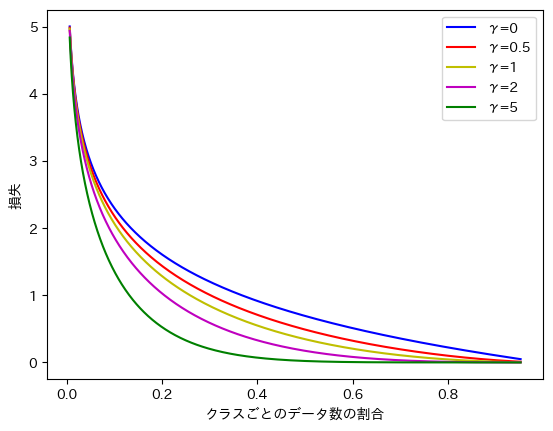

In [3]:
target = torch.tensor([0], dtype=torch.int64)

gammas = (0, 0.5, 1, 2, 5)  # gamma=0はCrossEntropyと等価
colors = ("b", "r", "y", "m", "g")

for gamma, color in zip(gammas, colors):
    loss = create_loss("focal", focal_gamma=gamma)
    inputs = []
    outputs = []
    for input in torch.arange(-2, 2, 0.005):
        input = torch.Tensor([[input, 1-input]])
        output = loss(input, target)
        inputs.append(F.softmax(input, dim=1)[0,0])
        outputs.append(output)
    plt.plot(inputs, outputs, color=color, label=f"γ={gamma}")

plt.xlabel('クラスごとのデータ数の割合')
plt.ylabel('損失')
plt.legend()